---
# **01_home_field_eda.ipynb**

#### **Visualization + Trends**

##### **Purpose:** *answer your question with visuals and clear narrative.*
---

### A. Load Clean Data

In [13]:
df_reg = pd.read_csv("../data/processed/games_reg_2000_2023_clean.csv")

### B. Overall Home Win Percentage

In [15]:
overall_home_win = df_reg["home_win"].mean() # Calculate the overall home win rate across all regular season games in the dataset. This will give us a baseline measure of home field advantage that we can compare against specific seasons, teams, or other factors in our analysis.
overall_home_win # Print the overall home win rate to the console. This will allow us to see the percentage of regular season games that were won by the home team, which is a key metric for understanding the extent of home field advantage in the NFL.

np.float64(0.5625710111994806)

### C. Home Win Rate by Season

In [18]:
season_win = (
    df_reg.groupby("season", as_index=False)
         .agg(home_win_rate=("home_win","mean"),
              n_games=("home_win","size"),
              tie_rate=("home_tie","mean"))
)

# Print the season_win DataFrame to the console. This will allow us to see the home win rate, number of games, and tie rate for each season in the dataset, which can help us identify trends or patterns in home field advantage over time.

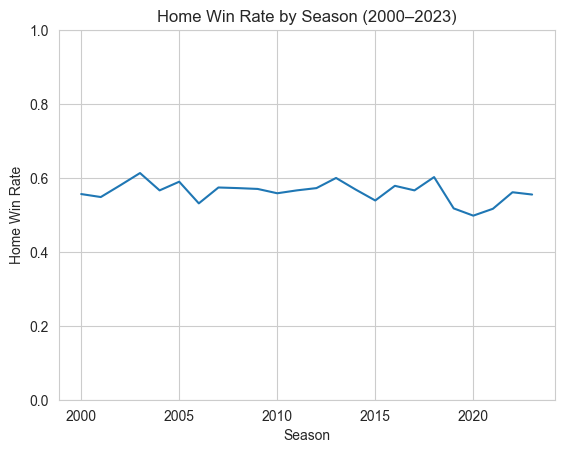

In [22]:
plt.figure()
plt.plot(season_win["season"], season_win["home_win_rate"])
plt.title("Home Win Rate by Season (2000–2023)")
plt.xlabel("Season")
plt.ylabel("Home Win Rate")
plt.ylim(0, 1)
plt.show()

# The plot above shows the home win rate for each season from 2000 to 2023. We can analyze this plot to identify any trends or patterns in home field advantage over time. For example, we might look for seasons with particularly high or low home win rates, or we might examine whether there is a general upward or downward trend in home win rates across the years. This analysis can help us understand how home field advantage has evolved in the NFL and whether it has become more or less significant over time.

### D. Rolling Average (Stronger Trend Signal)

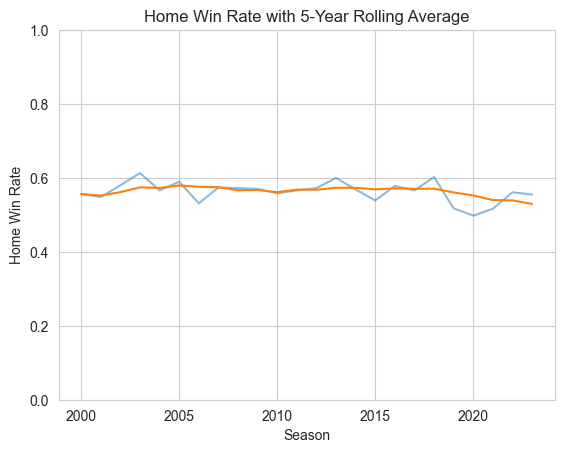

In [24]:
season_win["rolling_5yr"] = season_win["home_win_rate"].rolling(5, min_periods=1).mean()

plt.figure()
plt.plot(season_win["season"], season_win["home_win_rate"], alpha=0.5)
plt.plot(season_win["season"], season_win["rolling_5yr"])
plt.title("Home Win Rate with 5-Year Rolling Average")
plt.xlabel("Season")
plt.ylabel("Home Win Rate")
plt.ylim(0, 1)
plt.show()

### E. Home Margin Distribution

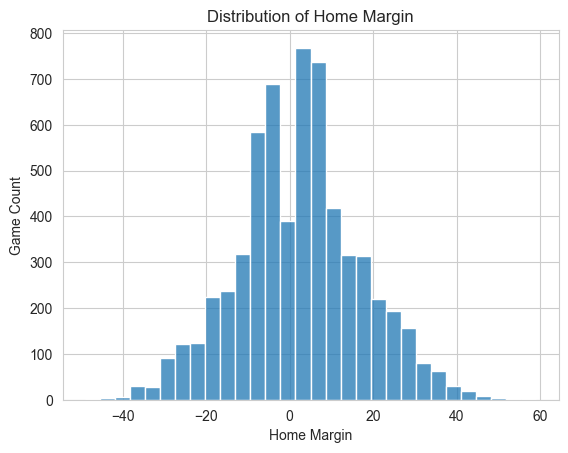

In [25]:
plt.figure()
sns.histplot(df_reg["home_margin"], bins=30)
plt.title("Distribution of Home Margin")
plt.xlabel("Home Margin")
plt.ylabel("Game Count")
plt.show()

###### *Could potentially load postseason and compare REG vs POST -> would need to load and compute the same rates for post season.*